In [1]:
#import das libs

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import pyodbc

In [8]:
tabela = pd.read_csv("adm_data.csv")
display(tabela)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


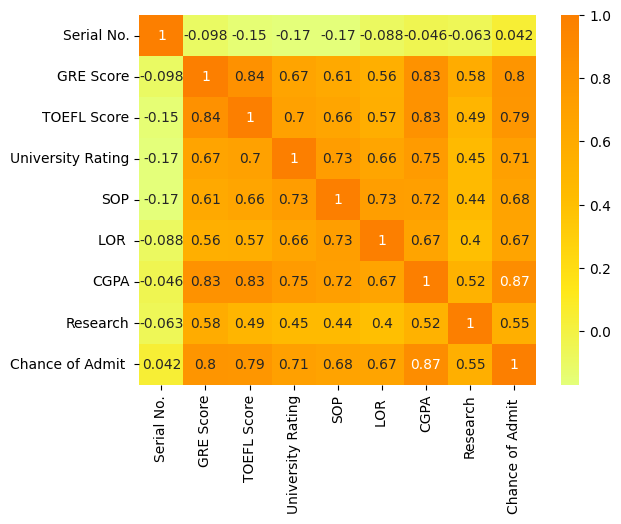

In [9]:
sns.heatmap(tabela.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [13]:
x = tabela.drop('CGPA', axis = 1)
y = tabela['CGPA']

In [15]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.3, random_state = 1)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit (x_train, y_train)

LinearRegression()

In [17]:
rf_reg = RandomForestRegressor()
rf_reg.fit (x_train, y_train)

RandomForestRegressor()

In [18]:
test_pred_lin = lin_reg.predict (x_test)
test_pred_rf = rf_reg.predict (x_test)


In [19]:
r2_lin = metrics.r2_score (y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))

In [20]:
r2_rf=metrics.r2_score(y_test, test_pred_rf)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))

In [21]:
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")
print(f"R² da Random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rmse_rf}")

R² da Regressão Linear: 0.8591381542499106
RSME da Regressão Linear: 0.22573263441865096
R² da Random Forest: 0.8588829430519985
RSME do Random Forest: 0.22593703123510664


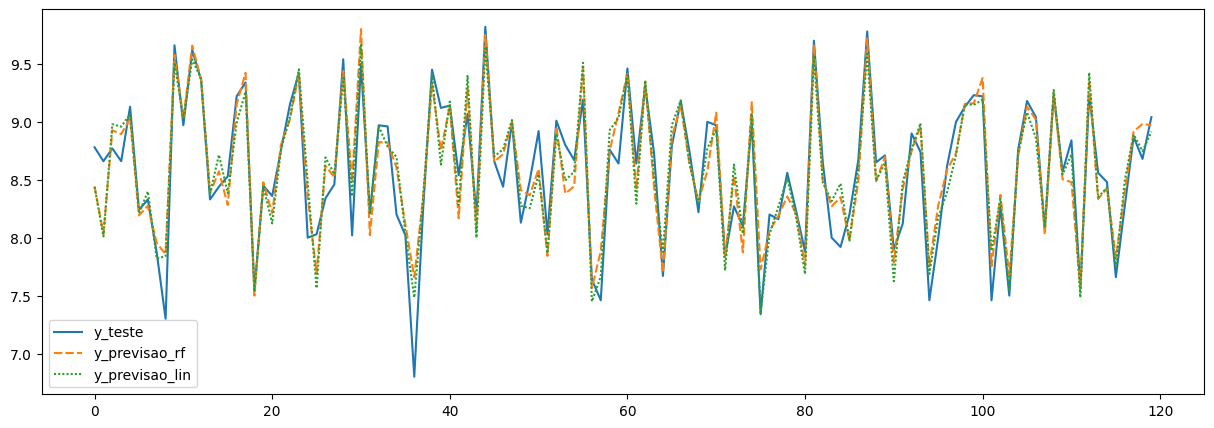

,y_teste,y_previsao_rf,y_previsao_lin
0,8.78,8.4428,8.438513
1,8.66,8.0319,8.011416
2,8.77,8.9268,8.979247
3,8.66,8.8942,8.958206
4,9.13,9.0250,9.065726
...,...,...,...
115,7.66,7.8278,7.747412
116,8.27,8.3933,8.492760
117,8.87,8.9166,8.890113
118,8.68,8.9808,8.747274


In [22]:
df_resultado = pd.DataFrame()
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

In [19]:
#conectando no banco
import pyodbc 

server = 'dbekran.database.windows.net'
database = 'dbekran'
username = '{222-1sis-grupo6@bandtec.com.br}'
password = '{grupo6@1sis}'
driver = '{ODBC Driver 18 for SQL Server}' 

cnxn = pyodbc.connect(
    #Trusted_Connection='false',
    DRIVER='{ODBC Driver 18 for SQL Server}',
    SERVER='{dbekran.database.windows.net}',
    DATABASE='{dbekran}',
    UID='{222-1sis-grupo6@bandtec.com.br}',
    PWD='{1sis@grupo6}'
)

connection = pyodbc.connect(cnxn) 

InterfaceError: ('28000', "[28000] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]Login failed for user '222-1sis-grupo6@bandtec.com.br'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC Driver 18 for SQL Server][SQL Server]Login failed for user '222-1sis-grupo6@bandtec.com.br'. (18456)")

In [8]:
import pyodbc 

cnxn =  pyodbc.connect("DRIVER={ODBC Driver 18 for SQL Server}Server=tcp:dbekran.database.windows.net,1433;Database=dbekran;User ID=222-1sis-grupo6@bandtec.com.br;Password=1sis@grupo6;Encrypt=True;TrustServerCertificate=False;Connection Timeout=30;")


Error: ('01S00', '[01S00] [Microsoft][ODBC Driver Manager] Atributo de cadeia de conexão inválido (0) (SQLDriverConnect)')